<a href="https://colab.research.google.com/github/wnrktkdtmd/Natural_language_processing/blob/master/ClusterWithDoc2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim==3.8.3

     |████████████████████████████████| 24.2MB 143kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# 구글 드라이브와 연동하는 코드
from os import path
from google.colab import drive

notebooks_dir_name = '2020년도 3학년 2학기/자연어처리/셉템버'
drive.mount('/content/gdrive')
notebook_base_dir = path.join('./gdrive/My Drive',notebooks_dir_name)
if not path.exists(notebook_base_dir):
  print ('error')

Mounted at /content/gdrive


In [ ]:
from gensim.models.doc2vec import Doc2Vec

model = Doc2Vec.load(notebook_base_dir + "/model.doc2vec") 

In [ ]:
len(model.docvecs)

4876

In [ ]:
for a in model.docvecs:
  print(a)

In [ ]:
docveclists=[]
for a in model.docvecs:
  docveclists.append(a)

KeyError: ignored

In [ ]:
import numpy as np
X = np.array(docveclists)

from sklearn.preprocessing import StandardScaler

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=8, min_samples=3)
#0.05, 15: 전부 -1
#0.1, 15: 전부 -1
#0.2, 15: 전부 -1
#0.5, 15: 전부 -1
#1, 15: 전부 -1
#2, 15: 전부 -1
#5, 15: -1 4846개, 0 30개 
#10, 15: -1 1647개, 0 3229개 
#20, 15: -1 2개, 0 4874개 

#0.5, 10: 전부 -1
#1, 10: 전부 -1
#2, 10: 전부 -1
#5, 10: -1 4845개, 0 31개
#10, 10: -1 33개, 0 4843개 
#20, 10: -1 2개, 0 4874개 

#0.5, 5: 전부 -1
#1, 5: 전부 -1
#2, 5: -1 4861개, 0 9개, 1 6개
#5, 5: -1 4826개, 0 32개, 1 5개, 2 6개, 3 7개
#7, 5: -1 4672개, 0 181개, 1 5개, 2 5개, 3 6개, 4 7개
#8, 5: -1 4157개, 0 719개 
#10, 5: -1 1630개, 0 3246개 

#0.5, 3: 전부 -1
#1, 3: -1 4872개, 0 4개 
#2, 3: -1 4855개, 0 9개, 1 6개, 2 3개, 3 3개
#5, 3:[4712, 3, 3, 4, 3, 32, 4, 3, 5, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 7] (-1 ~ 39)
#7, 3:[4523, 193, 3, 3, 3, 4, 3, 5, 3, 4, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 6, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 7] (-1 ~ 48)
#8, 3:[4038, 739, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4] (-1 ~ 32)
#10, 3:[1595, 3263, 3, 3, 3, 3, 3, 3] (-1 ~ 6)

clusters = dbscan.fit_predict(X_scaled)
print("클러스터 레이블:\n{}".format(clusters))

클러스터 레이블:
[ 0 -1 -1 ... -1 -1 -1]


In [ ]:
set(clusters)

In [ ]:
cnt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for c in clusters:
  cnt[c+1]+=1
    
print(cnt)

[4038, 739, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


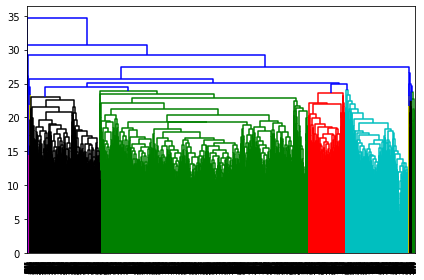

In [ ]:
# 완전연결 기법을 적용한 응집형 계층적 클러스터링 수행
from scipy.cluster.hierarchy import linkage

row_clusters_e=linkage(X_scaled, method='complete',metric='euclidean')

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr=dendrogram(row_clusters_e)
plt.tight_layout()
plt.show()

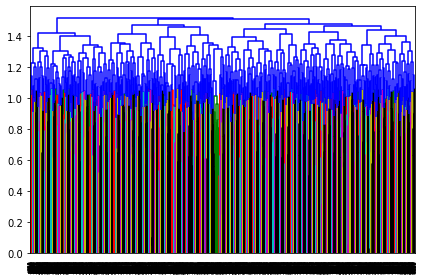

In [ ]:
row_clusters_c=linkage(X_scaled, method='complete',metric='cosine')

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr=dendrogram(row_clusters_c)
plt.tight_layout()
plt.show()

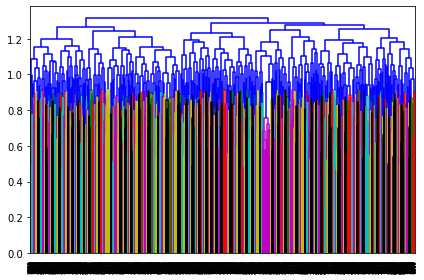

In [ ]:
row_clusters_c2=linkage(X, method='complete',metric='cosine')

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr=dendrogram(row_clusters_c2)
plt.tight_layout()
plt.show()

# DBSCAN 파라미터만 조절하면 됨. 
## - 결과보니 확실히 데이터간 거리가 크다
# HC는 덴드로그램 이후에 어떻게 할지 추가 조사 필요
## - 특정 클러스터수 선택 가능? 클러스터별로 라벨 남기려면?
# 공유할 데이터 형식 확정해야함
## - 인덱스, 제목, 가수, 가사, docvec, clusterLabel?